In [19]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind,f_oneway


import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 해결
plt.rcParams['font.family'] = 'AppleGothic'

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

pd.options.display.float_format = '{:.3f}'.format

In [3]:
# 데이터 불러오기
data = pd.read_parquet('./2008~2023_data.parquet')

### 변수 설명
- Date : 날짜 
- Station_num : 역 번호
- Line_num : 지하철 호선
- Station : 역 이름
- holiday : 공휴일(토요일, 일요일 포함)
- weekday : 요일 (일요일 :0, 월요일:1, ... 토요일 : 6)
- geton : 승차 인원
- getoff : 하차 인원
- get_all : 승하차 인원
- Temp : 온도
- Rainfall_amt : 강수량
- Wind_speed : 풍속
- Humidity : 습도
- Snow_amt : 적설량
- Temp_mean : 하루 평균 온도
- Rainfall_amt_mean : 하루 평균 강수량
- Wind_speed_mean : 하루 평균 풍속
- Humidity_mean : 하루 평균 습도
- Snow_amt_mean : 하루 평균 적설량
- Rainfall_amt_sum : 하루 강수량 합계
- Snow_amt_sum : 하루 적설량 합계 
- Temp_max : 하루 최고 기온
- Temp_min : 하루 최저 기온
- Temp_diff : 일교차
- hour : 시간
- year : 년도
- month : 월
- day : 일

In [5]:
import pandas as pd

# Calculate the IQR for each hour
grouped = data.groupby('hour')['log_get_all']
quartiles = grouped.quantile([0.25, 0.75])
lower_quartile = quartiles.loc[:, 0.25]
upper_quartile = quartiles.loc[:, 0.75]
iqr = upper_quartile - lower_quartile

# Define the lower and upper bounds for outliers
lower_bound = lower_quartile - 1.5 * iqr
upper_bound = upper_quartile + 1.5 * iqr

# Identify outliers
outliers = data[(data['log_get_all'] < lower_bound.loc[data['hour']].values) |
                     (data['log_get_all'] > upper_bound.loc[data['hour']].values)]

# Display the outliers
outliers


,Date,Line_num,Station,Station_num,Time,holiday,weekday,geton,getoff,get_all,...,Rainfall_amt_sum,Snow_amt_sum,Temp_max,Temp_min,Temp_diff,hour,year,month,day,log_get_all
56,2008-01-01,2,도림천(247),247,00:00,1,2,0.0,3.0,3.0,...,0.0,0.0,-3.4,-8.3,4.9,0,2008,1,1,1.386294
115,2008-01-01,4,남태령(434),434,00:00,1,2,0.0,2.0,2.0,...,0.0,0.0,-3.4,-8.3,4.9,0,2008,1,1,1.098612
125,2008-01-01,5,목동,2521,00:00,1,2,0.0,3.0,3.0,...,0.0,0.0,-3.4,-8.3,4.9,0,2008,1,1,1.386294
169,2008-01-01,6,독바위,2614,00:00,1,2,0.0,1.0,1.0,...,0.0,0.0,-3.4,-8.3,4.9,0,2008,1,1,0.693147
170,2008-01-01,6,구산,2616,00:00,1,2,1.0,0.0,1.0,...,0.0,0.0,-3.4,-8.3,4.9,0,2008,1,1,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30236510,2023-04-30,1,제기동,157,13:00,1,0,1292.0,8531.0,9823.0,...,0.1,0.0,17.5,7.9,9.6,13,2023,4,30,9.192584
30238201,2023-04-30,3,무악재,315,19:00,1,0,63.0,63.0,126.0,...,0.1,0.0,17.5,7.9,9.6,19,2023,4,30,4.844187
30238706,2023-04-30,2,종합운동장,218,21:00,1,0,14150.0,1195.0,15345.0,...,0.1,0.0,17.5,7.9,9.6,21,2023,4,30,9.638610
30238745,2023-04-30,3,무악재,315,21:00,1,0,48.0,47.0,95.0,...,0.1,0.0,17.5,7.9,9.6,21,2023,4,30,4.564348


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30239475 entries, 0 to 30239474
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Line_num           int64  
 2   Station            object 
 3   Station_num        int64  
 4   Time               object 
 5   holiday            int64  
 6   weekday            int64  
 7   geton              float64
 8   getoff             float64
 9   get_all            float64
 10  Temp               float64
 11  Rainfall_amt       float64
 12  Wind_speed         float64
 13  Humidity           float64
 14  Snow_amt           float64
 15  Temp_mean          float64
 16  Rainfall_amt_mean  float64
 17  Wind_speed_mean    float64
 18  Humidity_mean      float64
 19  Snow_amt_mean      float64
 20  Rainfall_amt_sum   float64
 21  Snow_amt_sum       float64
 22  Temp_max           float64
 23  Temp_min           float64
 24  Temp_diff          float64
 25  hour            

In [15]:
data.describe()

,Line_num,Station_num,holiday,weekday,geton,getoff,get_all,Temp,Rainfall_amt,Wind_speed,...,Snow_amt_sum,Temp_max,Temp_min,Temp_diff,hour,year,month,day,rainy,log_get_all
count,30239475.000,30239475.000,30239475.000,30239475.000,30239475.000,30239475.000,30239475.000,30239475.000,30239475.000,30239475.000,...,30239475.000,30239475.000,30239475.000,30239475.000,30239475.000,30239475.000,30239475.000,30239475.000,30239475.000,30239475.000
mean,4.640,1621.948,0.312,3.001,840.156,838.907,1679.063,13.356,0.156,2.528,...,4.238,17.340,9.069,8.270,13.385,2015.208,6.444,15.728,0.057,6.876
std,2.022,1175.061,0.463,1.999,1131.578,1183.737,1981.691,11.125,1.312,1.328,...,26.999,10.839,10.809,2.910,6.075,4.402,3.465,8.798,0.232,1.156
min,1.000,150.000,0.000,0.000,0.000,0.000,1.000,-18.500,0.000,0.000,...,0.000,-11.200,-18.500,1.100,0.000,2008.000,1.000,1.000,0.000,0.693
25%,3.000,316.000,0.000,1.000,222.000,228.000,519.000,4.200,0.000,1.600,...,0.000,8.100,0.100,6.200,9.000,2011.000,3.000,8.000,0.000,6.254
50%,5.000,2528.000,0.000,3.000,495.000,494.000,1069.000,14.500,0.000,2.400,...,0.000,19.000,9.700,8.200,14.000,2015.000,6.000,16.000,0.000,6.975
75%,6.000,2645.000,1.000,5.000,996.000,979.000,2061.000,23.000,0.000,3.300,...,0.000,26.900,18.700,10.200,19.000,2019.000,9.000,23.000,0.000,7.631
max,8.000,2828.000,1.000,6.000,37569.000,30554.000,41740.000,39.400,71.000,11.400,...,564.600,39.400,30.400,18.100,23.000,2023.000,12.000,31.000,1.000,10.639


In [5]:
data.head()

,Date,Line_num,Station,Station_num,Time,holiday,weekday,geton,getoff,get_all,...,Snow_amt_mean,Rainfall_amt_sum,Snow_amt_sum,Temp_max,Temp_min,Temp_diff,hour,year,month,day
0,2008-01-01,1,서울역(150),150,00:00,1,2,264.0,558.0,822.0,...,0.0,0.0,0.0,-3.4,-8.3,4.9,0,2008,1,1
1,2008-01-01,1,시청(151),151,00:00,1,2,974.0,185.0,1159.0,...,0.0,0.0,0.0,-3.4,-8.3,4.9,0,2008,1,1
2,2008-01-01,1,종각(152),152,00:00,1,2,1559.0,210.0,1769.0,...,0.0,0.0,0.0,-3.4,-8.3,4.9,0,2008,1,1
3,2008-01-01,1,종로3가(153),153,00:00,1,2,1499.0,384.0,1883.0,...,0.0,0.0,0.0,-3.4,-8.3,4.9,0,2008,1,1
4,2008-01-01,1,종로5가(154),154,00:00,1,2,140.0,42.0,182.0,...,0.0,0.0,0.0,-3.4,-8.3,4.9,0,2008,1,1


### 데이터 결측치 확인
- 데이터 결측지 없음 확인

In [6]:
data.isnull().sum()


Date                 0
Line_num             0
Station              0
Station_num          0
Time                 0
holiday              0
weekday              0
geton                0
getoff               0
get_all              0
Temp                 0
Rainfall_amt         0
Wind_speed           0
Humidity             0
Snow_amt             0
Temp_mean            0
Rainfall_amt_mean    0
Wind_speed_mean      0
Humidity_mean        0
Snow_amt_mean        0
Rainfall_amt_sum     0
Snow_amt_sum         0
Temp_max             0
Temp_min             0
Temp_diff            0
hour                 0
year                 0
month                0
day                  0
dtype: int64

In [7]:
data['rainy'] = data['Rainfall_amt']>0.0

data['rainy'] = data['rainy'].astype(np.int32)

In [8]:
data['log_get_all'] = np.log1p(data['get_all'])

### 승하차인원의 정규성 검정
- 정규성 검정 진행 (p-value < 0.05 이므로 귀무가설 기각.) 
- 승하차 인원 데이터는 정규분포를 띄지 않는다.

In [10]:
# 귀무가설 : 승하차 인원 데이터 분포는 정규 분포이다.
# 대립가설 : 승하차 인원 데이터 분포는 정규 분포를 띄지 않을것이다.
stats.normaltest(data['get_all'])

NormaltestResult(statistic=22613977.558822587, pvalue=0.0)

In [11]:
# 귀무가설 : 로그 스케일링 후 승하차 인원 데이터 분포는 정규 분포이다.
# 대립가설 : 로그 스케일링 후 승하차 인원 데이터 분포는 정규 분포를 띄지 않을것이다.
stats.normaltest(data['log_get_all'])

NormaltestResult(statistic=3448192.2500927923, pvalue=0.0)

### 변수별 유의성 검정
- 제공된 p-value를 기반으로 회귀 모델에서 모든 변수가 목표 변수에 통계적으로 유의미한 영향을 미친다는 결론을 내릴 수 있다.


In [8]:
import pandas as pd
from scipy.stats import f_oneway


Station_num_data = data[['get_all', 'Station_num']]
line_data = data[['get_all', 'Line_num']]
weekday_data = data[['get_all', 'weekday']]
hour_data = data[['get_all', 'hour']]
year_data = data[['get_all', 'year']]
month_data = data[['get_all', 'month']]
day_data = data[['get_all', 'day']]

station_groups = []
for num in data.Station_num.unique():
    group = Station_num_data[Station_num_data['Station_num'] == num]['get_all']
    station_groups.append(group)

line_groups = []
for line in data.Line_num.unique():
    group = line_data[line_data['Line_num'] == line]['get_all']
    line_groups.append(group)

weekday_groups = []
for weekday in data.weekday.unique():
    group = weekday_data[weekday_data['weekday'] == weekday]['get_all']
    weekday_groups.append(group)

hour_groups = []
for hour in data.hour.unique():
    group = hour_data[hour_data['hour'] == hour]['get_all']
    hour_groups.append(group)

year_groups = []
for year in data.year.unique():
    group = year_data[year_data['year'] == year]['get_all']
    year_groups.append(group)

month_groups = []
for month in data.month.unique():
    group = month_data[month_data['month'] == month]['get_all']
    month_groups.append(group)

day_groups = []
for day in data.day.unique():
    group = day_data[day_data['day'] == day]['get_all']
    day_groups.append(group)

f_stat_station, p_value_station = f_oneway(*station_groups)
f_stat_line, p_value_line = f_oneway(*line_groups)
f_stat_weekday, p_value_weekday = f_oneway(*weekday_groups)
f_stat_hour, p_value_hour = f_oneway(*hour_groups)
f_stat_year, p_value_year = f_oneway(*year_groups)
f_stat_month, p_value_month = f_oneway(*month_groups)
f_stat_day, p_value_day = f_oneway(*day_groups)

# Print the p-values
print("Station Significance Probability (p-value):", p_value_station)
print("Line Significance Probability (p-value):", p_value_line)
print("Weekday Significance Probability (p-value):", p_value_weekday)
print("Hour Significance Probability (p-value):", p_value_hour)
print("Year Significance Probability (p-value):", p_value_year)
print("Month Significance Probability (p-value):", p_value_month)
print("Day Significance Probability (p-value):", p_value_day)


Station Significance Probability (p-value): 0.0
Line Significance Probability (p-value): 0.0
Weekday Significance Probability (p-value): 0.0
Hour Significance Probability (p-value): 0.0
Year Significance Probability (p-value): 0.0
Month Significance Probability (p-value): 0.0
Day Significance Probability (p-value): 0.0


#### Two Sample T Test (이표본 평균검정)
- 두 집단 평균의 차이가 있는지 검정
- 집단이 서로 등분산성을 보이지 않을 때 

- Levene Test : 두 집단 분산의 차이가 있는지 검정
    - 귀무가설 : 두 집단의 분산이 같다.
    - 대립가설 : 두 집단의 분산이 다르다.

In [22]:
# 두 집단의 등분산 검정
# 귀무 가설 : 비가 온 날과 비가 오지 않은 날의 승하차 인원의 분산의 차이가 없다.
# 대립 가설 : 비가 온 날과 비가 오지 않은 날의 승하차 인원의 분산의 차이가 있다.
rainy_data = data[['get_all', 'rainy']]

rainy_o = rainy_data[rainy_data['rainy'] == 1]
rainy_x = rainy_data[rainy_data['rainy'] == 0]

stats.levene(rainy_o['get_all'], rainy_x['get_all'])

# p-value < 0.05 (귀무가설 기각, 대립가설 참)

LeveneResult(statistic=1280.0203117274448, pvalue=2.517710367040132e-280)

In [24]:
# 두 집단의 등분산 검정
# 귀무 가설 : 공휴일과 공휴일이 아닌 날의 승하차 인원의 분산의 차이가 없다.
# 대립 가설 : 공휴일과 공휴일이 아닌 날의 승하차 인원의 분산의 차이가 있다.

holiday_data = data[['get_all', 'holiday']]

holiday_o = holiday_data[holiday_data['holiday'] == 1]
holiday_x = holiday_data[holiday_data['holiday'] == 0]

stats.levene(holiday_o['get_all'], holiday_x['get_all'])

# p-value < 0.05 (귀무가설 기각, 대립가설 참)

LeveneResult(statistic=401477.3298328294, pvalue=0.0)

#### 이표본 평균 검정 진행
- 귀무가설 : 공휴일, 비온날과 공휴일이 아닌날, 비가 오지 않은날 승하차 평균인원의 차이가 없다.
- 대립가설 : 공휴일, 비온날과 공휴일이 아닌날, 비가 오지 않은날 승하차 평균인원의 차이가 있다.

In [9]:
# Select the relevant columns for the analysis
rainy_data = data[['get_all', 'rainy']]
holiday_data = data[['get_all', 'holiday']]

rainy_o = rainy_data[rainy_data['rainy'] == 1]['get_all']
rainy_x = rainy_data[rainy_data['rainy'] == 0]['get_all']

holiday_o = holiday_data[holiday_data['holiday'] == 1]['get_all']
holiday_x = holiday_data[holiday_data['holiday'] == 0]['get_all']

# Perform the t-test
t_stat_rainy, p_value_rainy = ttest_ind(rainy_x, rainy_o)
t_stat_holiday, p_value_holiday = ttest_ind(holiday_x, rainy_o)


# Print the p-value
print("Rainy Significance Probability (p-value):", p_value_rainy)
print("Holiday Significance Probability (p-value):", p_value_holiday)

Rainy Significance Probability (p-value): 0.0
Holiday Significance Probability (p-value): 0.0


### 변수별 상관관계 확인 
- 승하차인원과 상관관계가 높은 것은 호선, 역번호, 공휴일, 시간 순으로 확인 가능.

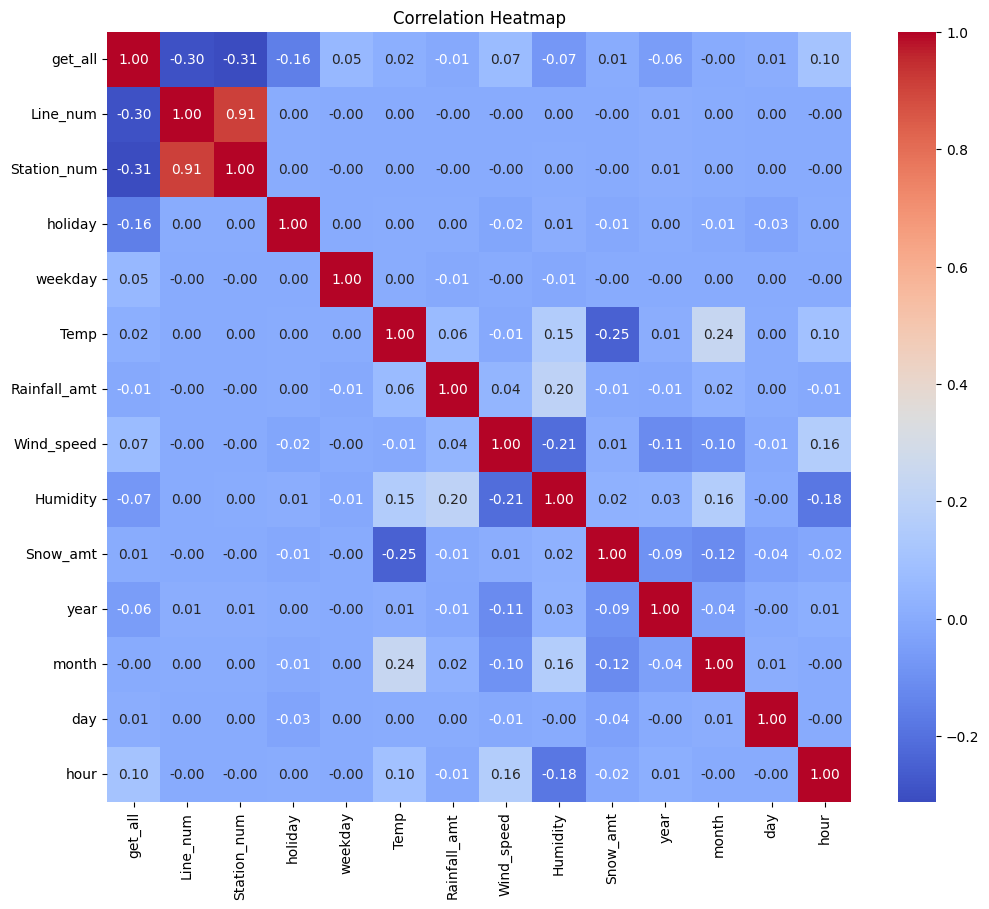

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select the relevant columns for correlation analysis
columns_of_interest = ['get_all', 'Line_num', 'Station_num', 'holiday', 'weekday', 'Temp', 'Rainfall_amt',
                       'Wind_speed', 'Humidity', 'Snow_amt', 'year', 'month', 'day', 'hour']
correlation_df = data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Add a title
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()



### 데이터가 너무 커서 시각화 할때 커널이 죽는 문제를 해결하기 위해 샘플데이터로 EDA 진행

In [10]:
sample_df = data.sample(200000)

In [26]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 13571074 to 21244307
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               200000 non-null  object 
 1   Line_num           200000 non-null  int64  
 2   Station            200000 non-null  object 
 3   Station_num        200000 non-null  int64  
 4   Time               200000 non-null  object 
 5   holiday            200000 non-null  int64  
 6   weekday            200000 non-null  int64  
 7   geton              200000 non-null  float64
 8   getoff             200000 non-null  float64
 9   get_all            200000 non-null  float64
 10  Temp               200000 non-null  float64
 11  Rainfall_amt       200000 non-null  float64
 12  Wind_speed         200000 non-null  float64
 13  Humidity           200000 non-null  float64
 14  Snow_amt           200000 non-null  float64
 15  Temp_mean          200000 non-null  float6

### 승하차인원 정규분포 확인 시각화

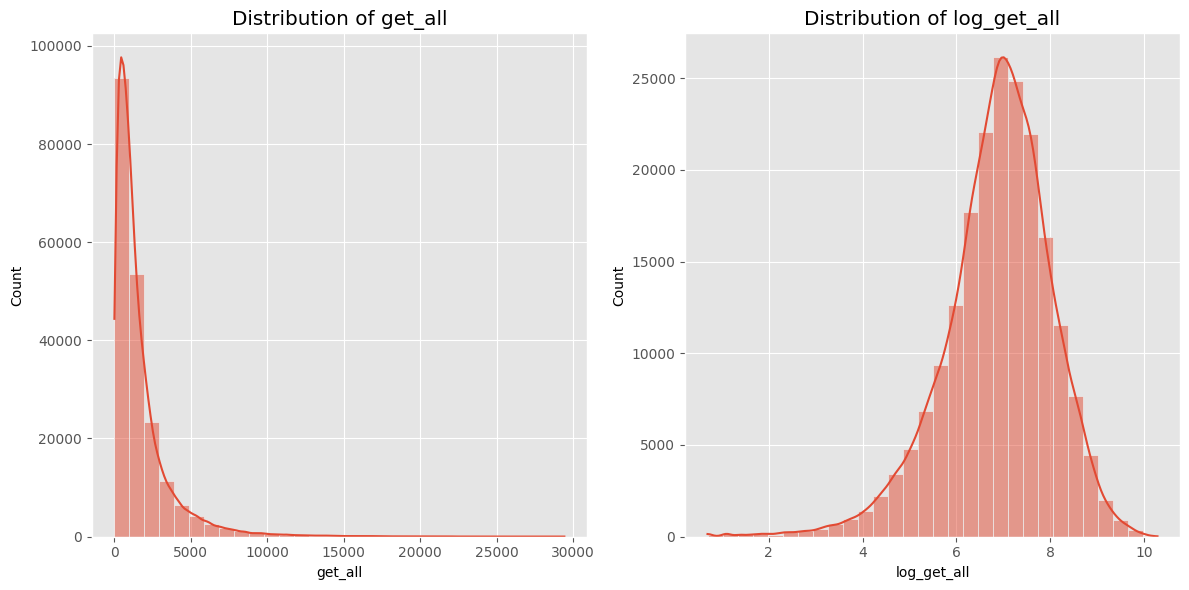

In [11]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for 'get_all'
sns.histplot(data=sample_df, x='get_all', bins=30, kde=True, ax=axes[0])
axes[0].set_xlabel('get_all')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of get_all')

# Plot histogram for 'log_get_all'
sns.histplot(data=sample_df, x='log_get_all', bins=30, kde=True, ax=axes[1])
axes[1].set_xlabel('log_get_all')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of log_get_all')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### 날짜별 승하차 인원 분석
- 연도별 승하차 인원은 2008~2019년도 까지 차이가 없다가 2020년 이후로 급격하게 줄어드는 것을 확인 할 수 있다.
- 월별 승하차 인원은 1,2,7,8월이 상대적으로 적은 것을 확인 할 수 있다.
- 일별 승하차 인원은 거의 차이가 없는것을 확인 할 수 있다.
- 시간별 승하차 인원은 출퇴근 시간인 8시와 18시에 많은 것을 확인 할 수 있다.
- 요일별 승하차 인원은 금요일이 가장 많은 것을 확인 할 수 있었으며, 주말은 평일보다 적은 것을 확인 할 수 있었다.
- 12시부터 15시 사이 평일 보다 공휴일에 승하차 인원이 더 많은 것을 확인 할 수 있다.

<Axes: xlabel='hour', ylabel='get_all'>

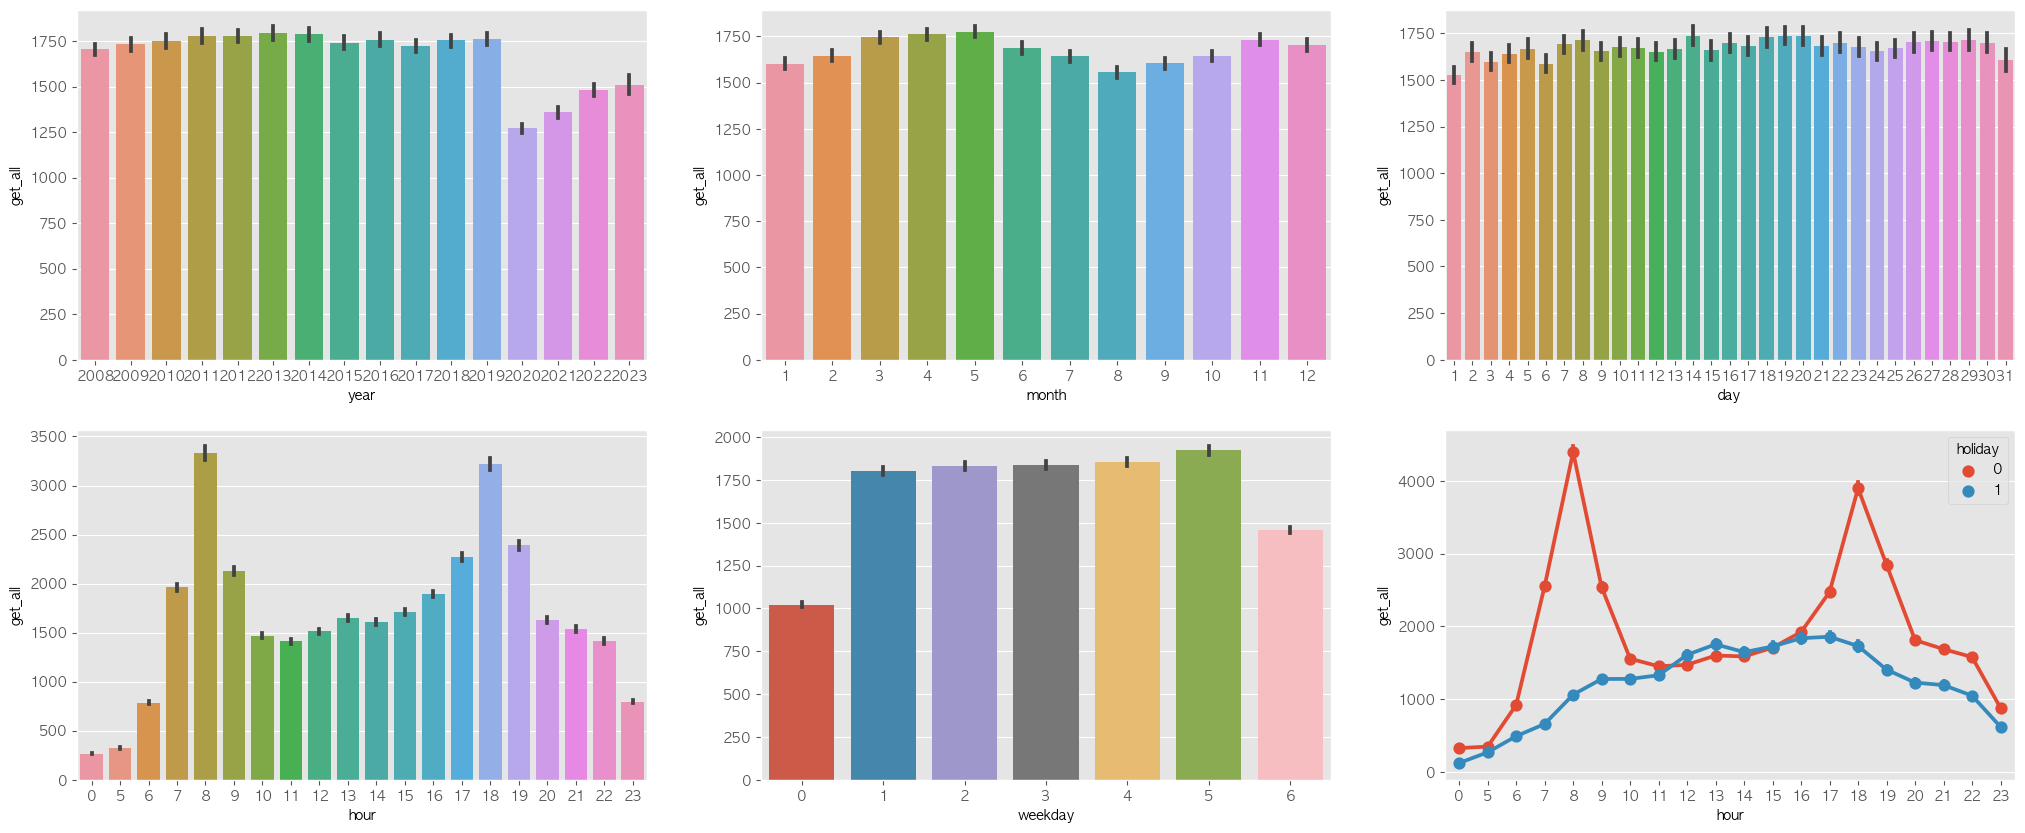

In [46]:
figure, axes = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(25,10)

sns.barplot(data=sample_df, x="year", y="get_all", ax=axes[0, 0])
sns.barplot(data=sample_df, x="month", y="get_all", ax=axes[0, 1])
sns.barplot(data=sample_df, x="day", y="get_all", ax=axes[0, 2])
sns.barplot(data=sample_df, x="hour", y="get_all", ax=axes[1, 0])
sns.barplot(data=sample_df, x="weekday", y="get_all", ax=axes[1, 1])
sns.pointplot(data = sample_df, x = 'hour', y = 'get_all', hue = 'holiday', ax=axes[1, 2])


### 날씨별 승하차 인원 분석
- 날씨별 승하차 인원이 선형성이 없는 것을 확인 할 수 있었음.
- 출퇴근 시간을 제외한 시간에는 비가 온날보다 비가 오지 않은날에 승하차 인원이 조금더 많은 것을 확인 할 수 있었음.
- 강수량과 적설량이 0이 많이 있는 것을 확인 할 수 있음.

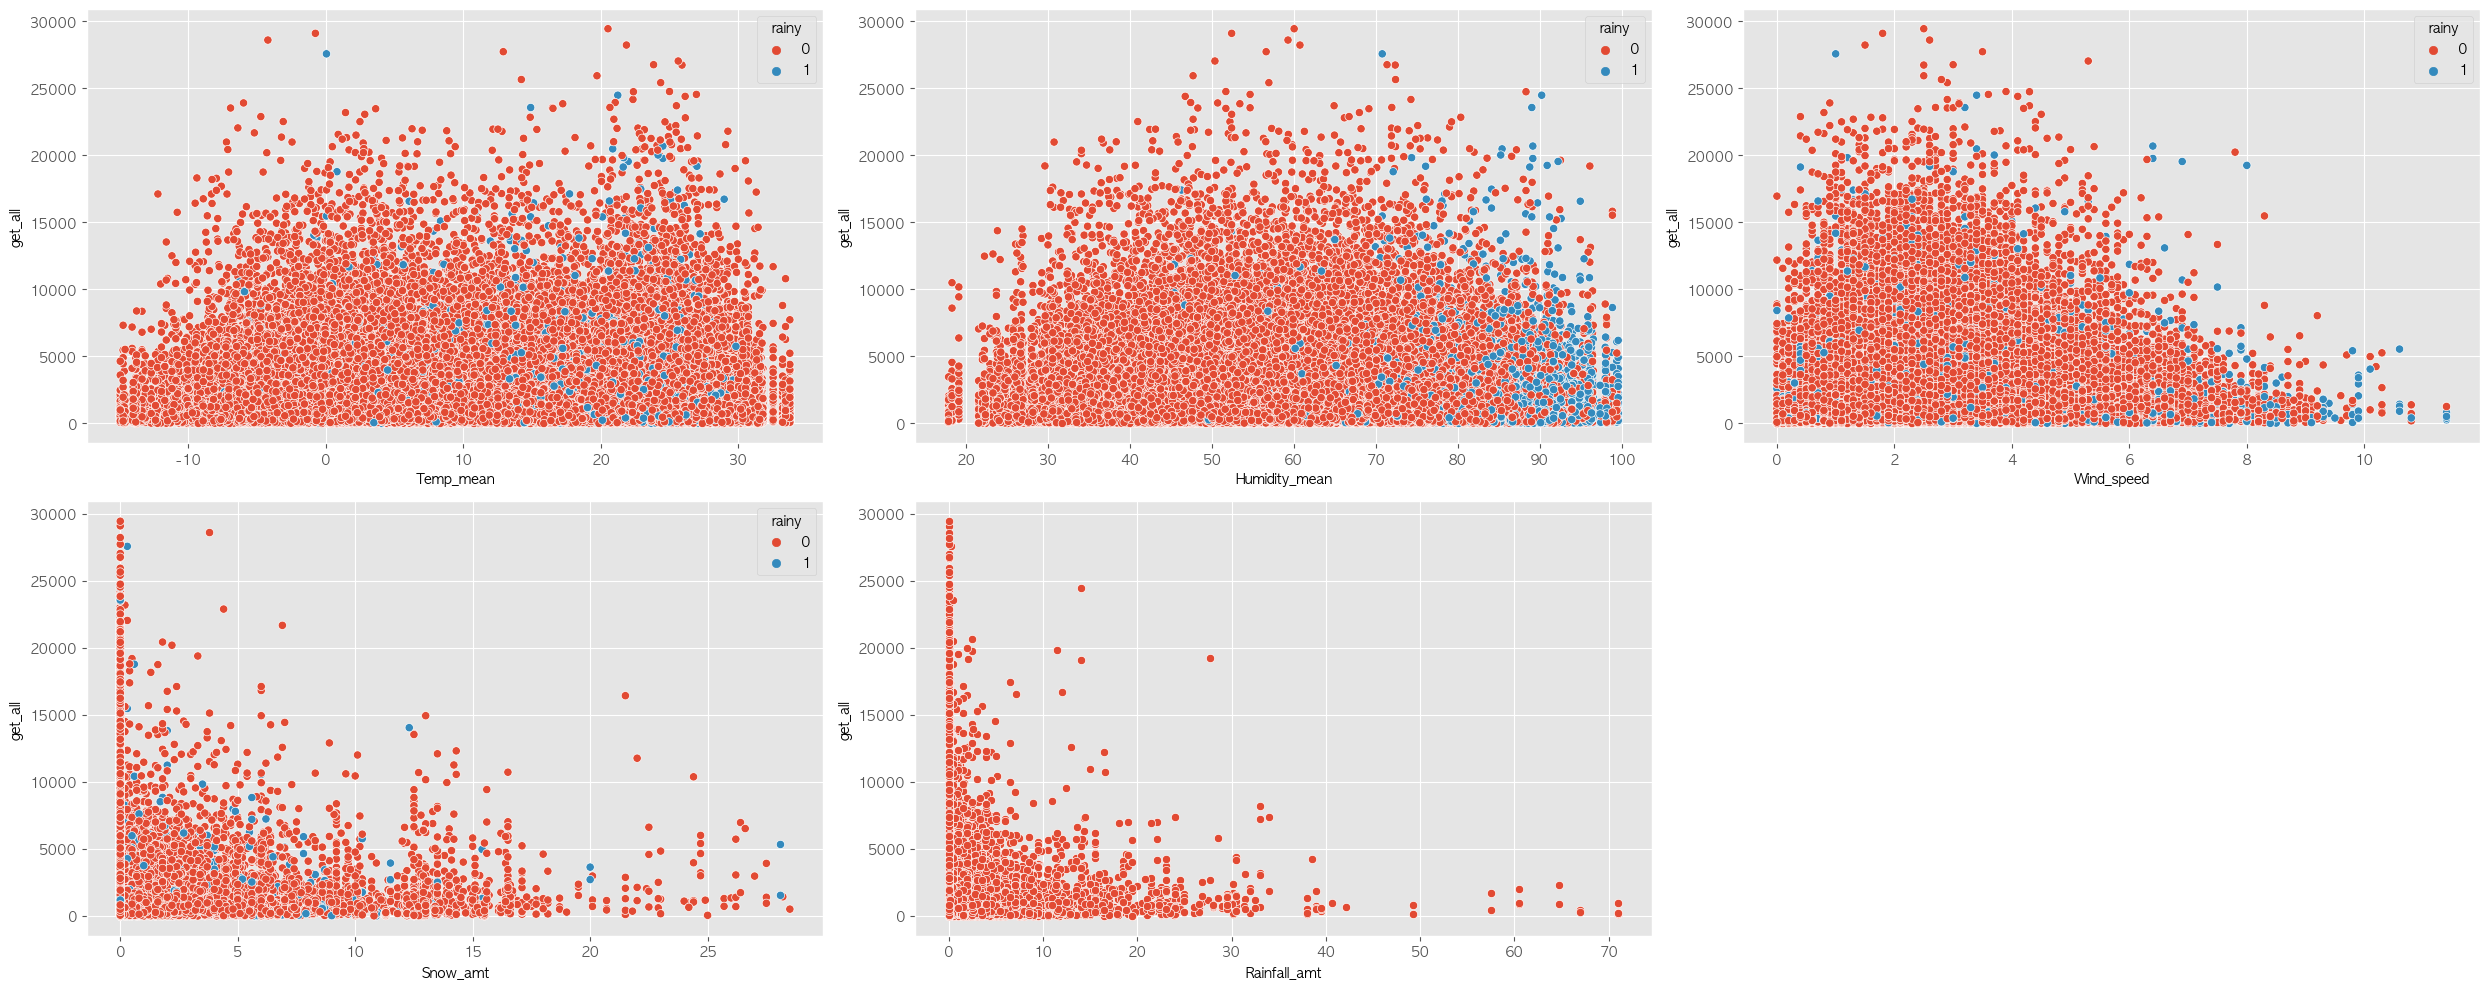

In [24]:
figure, axes = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(25, 10)

sns.scatterplot(data=sample_df, x="Temp_mean", y="get_all", hue='rainy', ax=axes[0, 0])
sns.scatterplot(data=sample_df, x="Humidity_mean", y="get_all", hue='rainy', ax=axes[0, 1])
sns.scatterplot(data=sample_df, x="Wind_speed", y="get_all", hue='rainy', ax=axes[0, 2])
sns.scatterplot(data=sample_df, x="Snow_amt", y="get_all", hue='rainy', ax=axes[1, 0])
sns.scatterplot(data=sample_df, x="Rainfall_amt", y="get_all", ax=axes[1, 1])

axes[1, 2].remove()

plt.tight_layout()

plt.show()


<Axes: xlabel='hour', ylabel='get_all'>

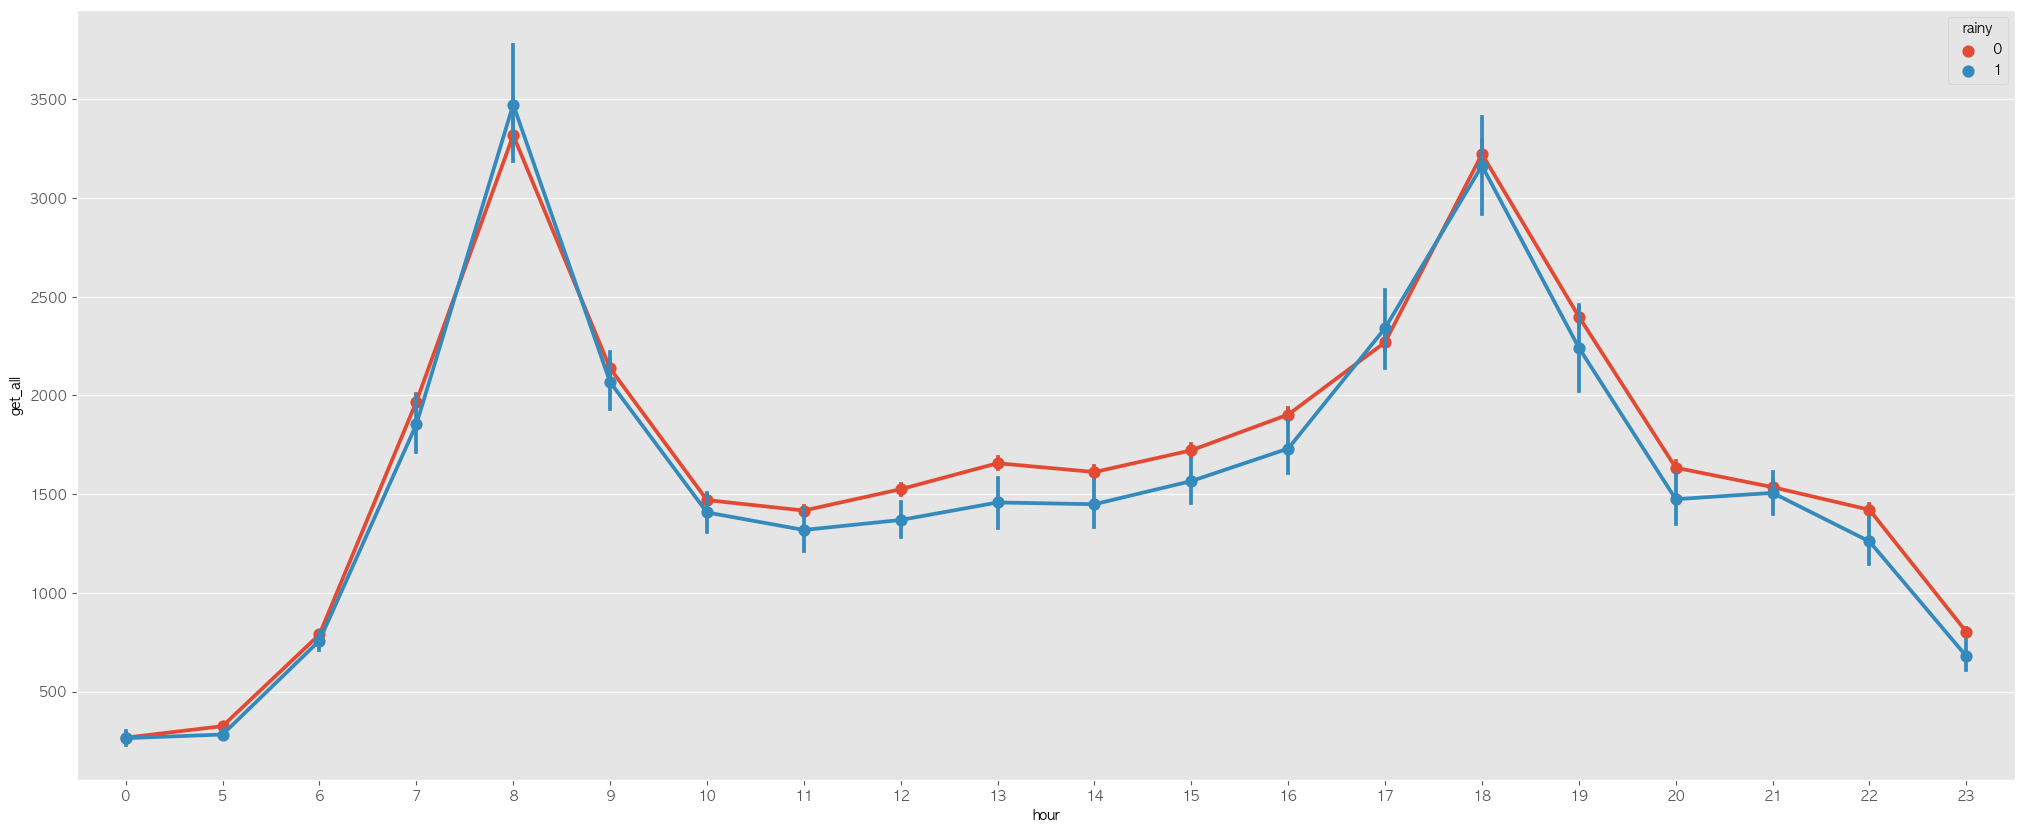

In [28]:
figure, axes = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(25, 10)

sns.pointplot(data=sample_df, x="hour", y="get_all",hue='rainy')


### 호선별 승하차 인원 분석
- 2호선, 1호선, 4호선, 3호선 순으로 승하차 인원이 많은 것을 확인 할 수 있음

<Axes: xlabel='hour', ylabel='get_all'>

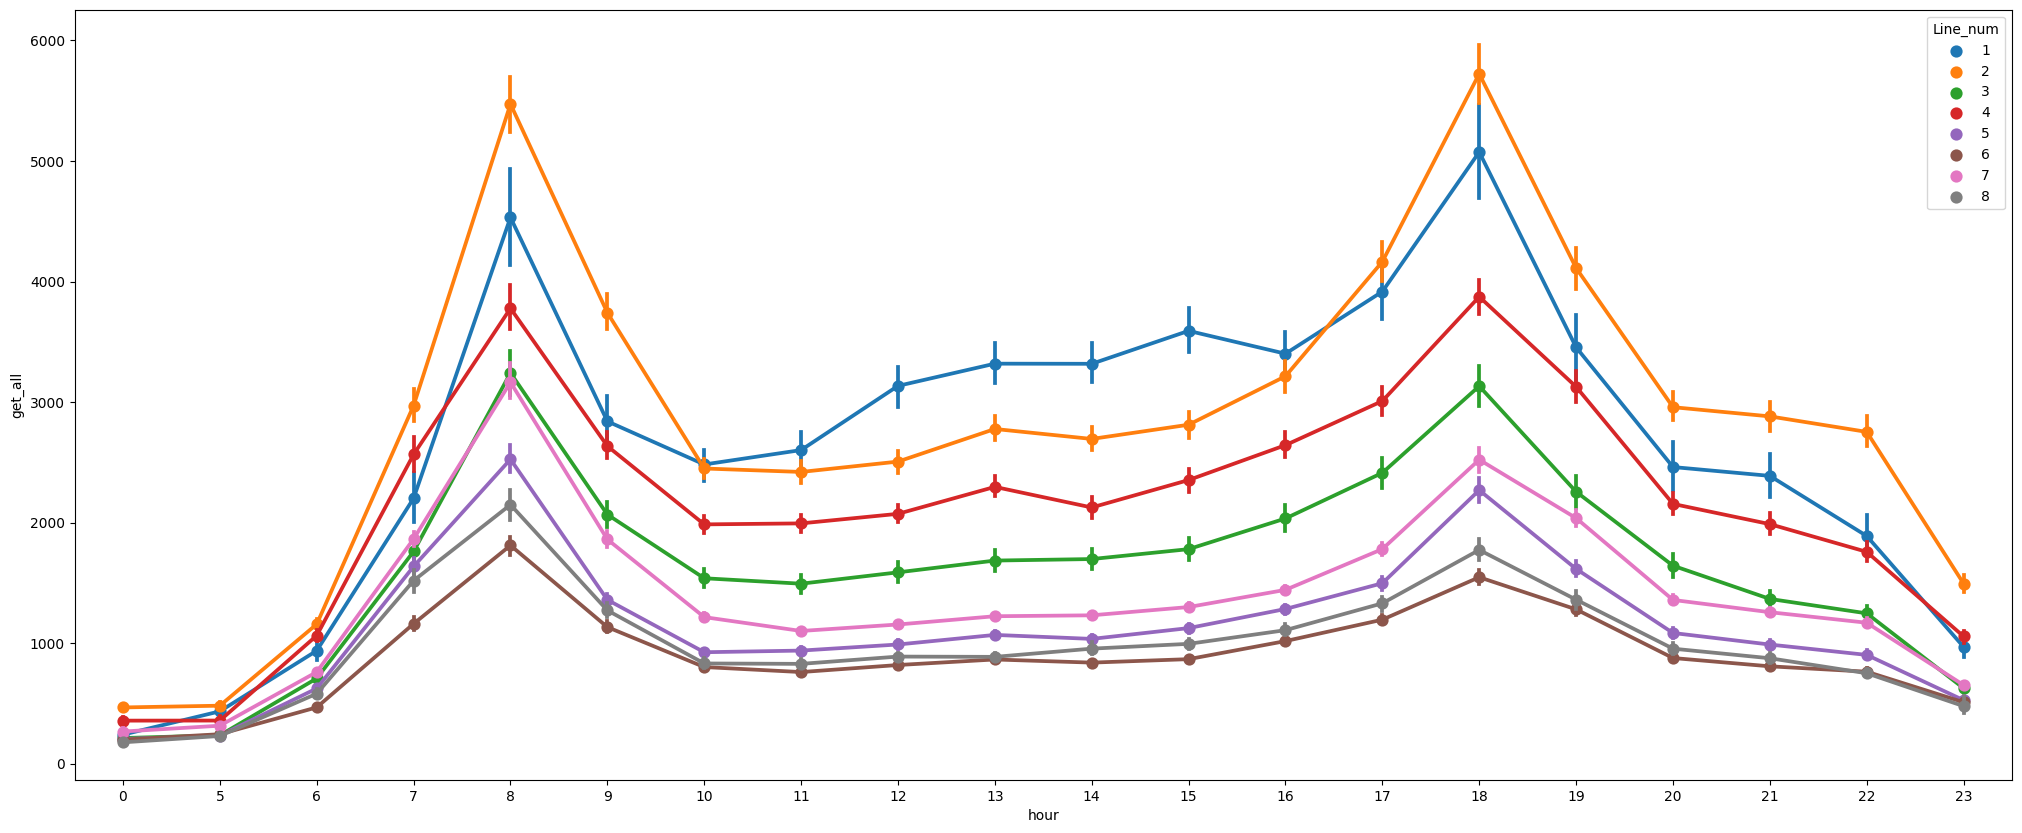

In [26]:
figure, ax8 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(25, 10)
sns.pointplot(data = sample_df, x = 'hour', y = 'get_all', hue = 'Line_num', ax = ax8)

### 날짜 데이터 분포와 이상치 확인
- 날짜,요일별 이상치를 확인 하였을때 이상치가 다소 있는것으로 확인 되어짐 출퇴근 시간에 영향을 받았을 것이라 추정

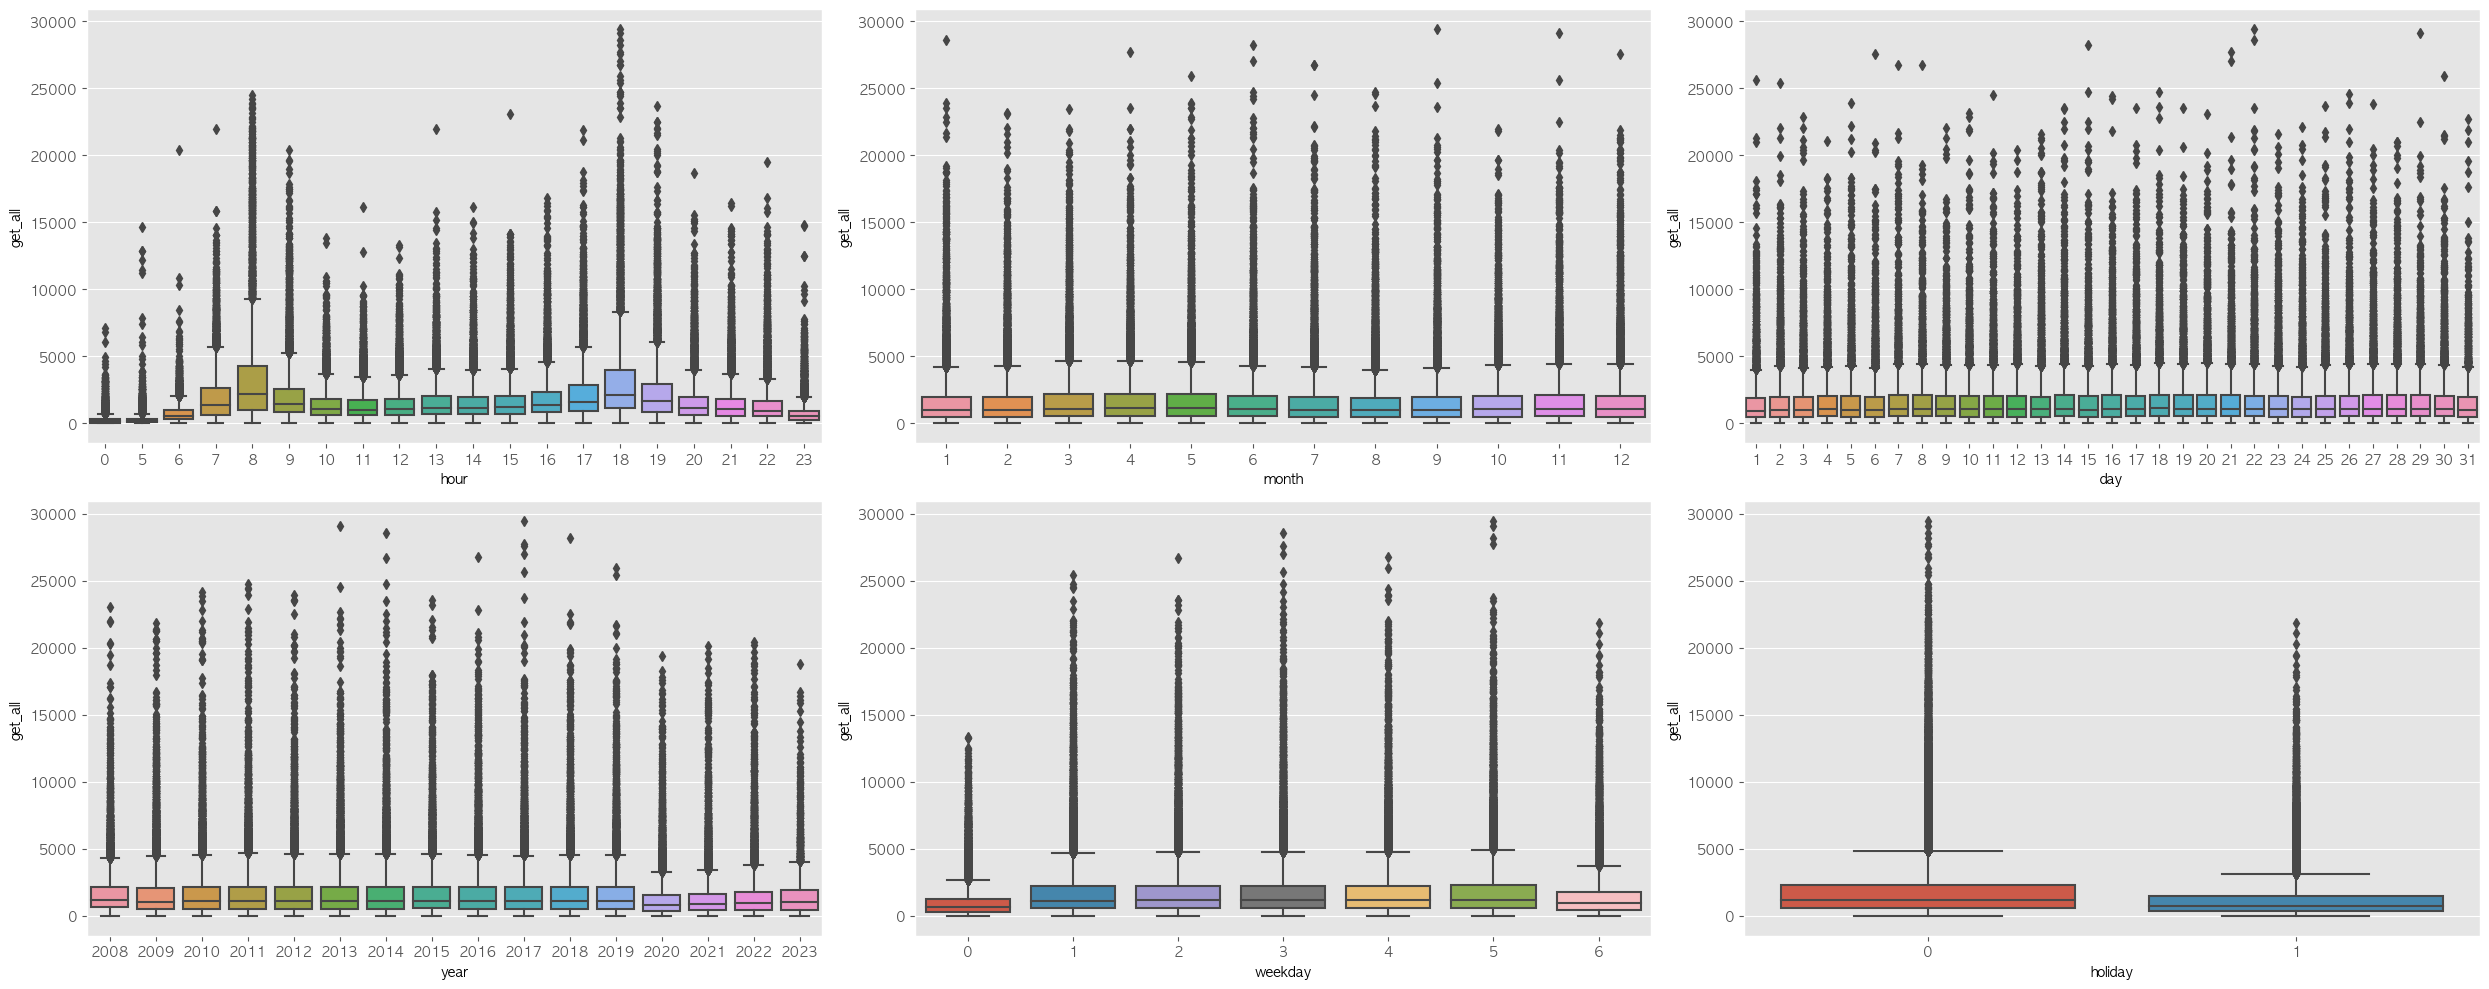

In [42]:
figure, axes = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(25, 10)

sns.boxplot(data=sample_df, x="hour", y="get_all", ax=axes[0, 0])
sns.boxplot(data=sample_df, x="month", y="get_all", ax=axes[0, 1])
sns.boxplot(data=sample_df, x="day", y="get_all", ax=axes[0, 2])
sns.boxplot(data=sample_df, x="year", y="get_all", ax=axes[1, 0])
sns.boxplot(data=sample_df, x="weekday", y="get_all", ax=axes[1, 1])
sns.boxplot(data=sample_df, x="holiday", y="get_all", ax=axes[1, 2])

plt.tight_layout()

plt.show()

### 다중공선성 확인

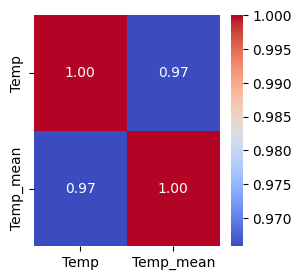

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select the relevant columns for correlation analysis
columns_of_interest = ['Temp','Temp_mean']
correlation_df = data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Create the heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Display the heatmap
plt.show()


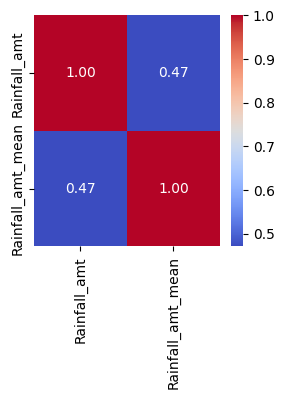

In [33]:
# Select the relevant columns for correlation analysis
columns_of_interest = ['Rainfall_amt','Rainfall_amt_mean']
correlation_df = data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Create the heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Display the heatmap
plt.show()

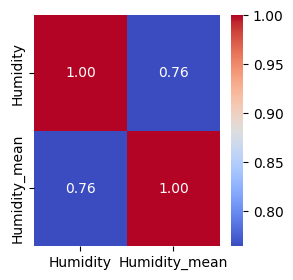

In [34]:
# Select the relevant columns for correlation analysis
columns_of_interest = ['Humidity','Humidity_mean']
correlation_df = data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Create the heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Display the heatmap
plt.show()